Big sales prediction using Random Forest Regressor

Data source - Github

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Import Data

In [2]:
df = pd.read_csv("Big Sales Data.csv")

In [3]:
df.head(9999999999999)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDG47,12.8,Low Fat,0.069606,Starchy Foods,261.9252,OUT035,2004,Small,Tier 2,Supermarket Type1,4984.178800
14200,FDG47,12.8,Low Fat,0.070013,Starchy Foods,262.8252,OUT017,2007,Medium,Tier 2,Supermarket Type1,2885.577200
14201,FDG47,12.8,Low Fat,0.069561,Starchy Foods,263.0252,OUT013,1987,High,Tier 3,Supermarket Type1,2885.577200
14202,FDG47,NaN,Low Fat,0.069282,Starchy Foods,263.5252,OUT027,1985,Medium,Tier 3,Supermarket Type3,3803.676434


Describe Data

In [59]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.353351,0.065953,141.004977,1997.830681,2185.836320
std,4.251186,0.478027,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.000000,0.027036,94.012000,1987.000000,922.135101
50%,12.800000,0.000000,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,1.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,1.000000,0.328391,266.888400,2009.000000,31224.726950


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

C:\Users\cheru\AppData\Local\Temp\ipykernel_32980\3861763913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)


Data Visualization

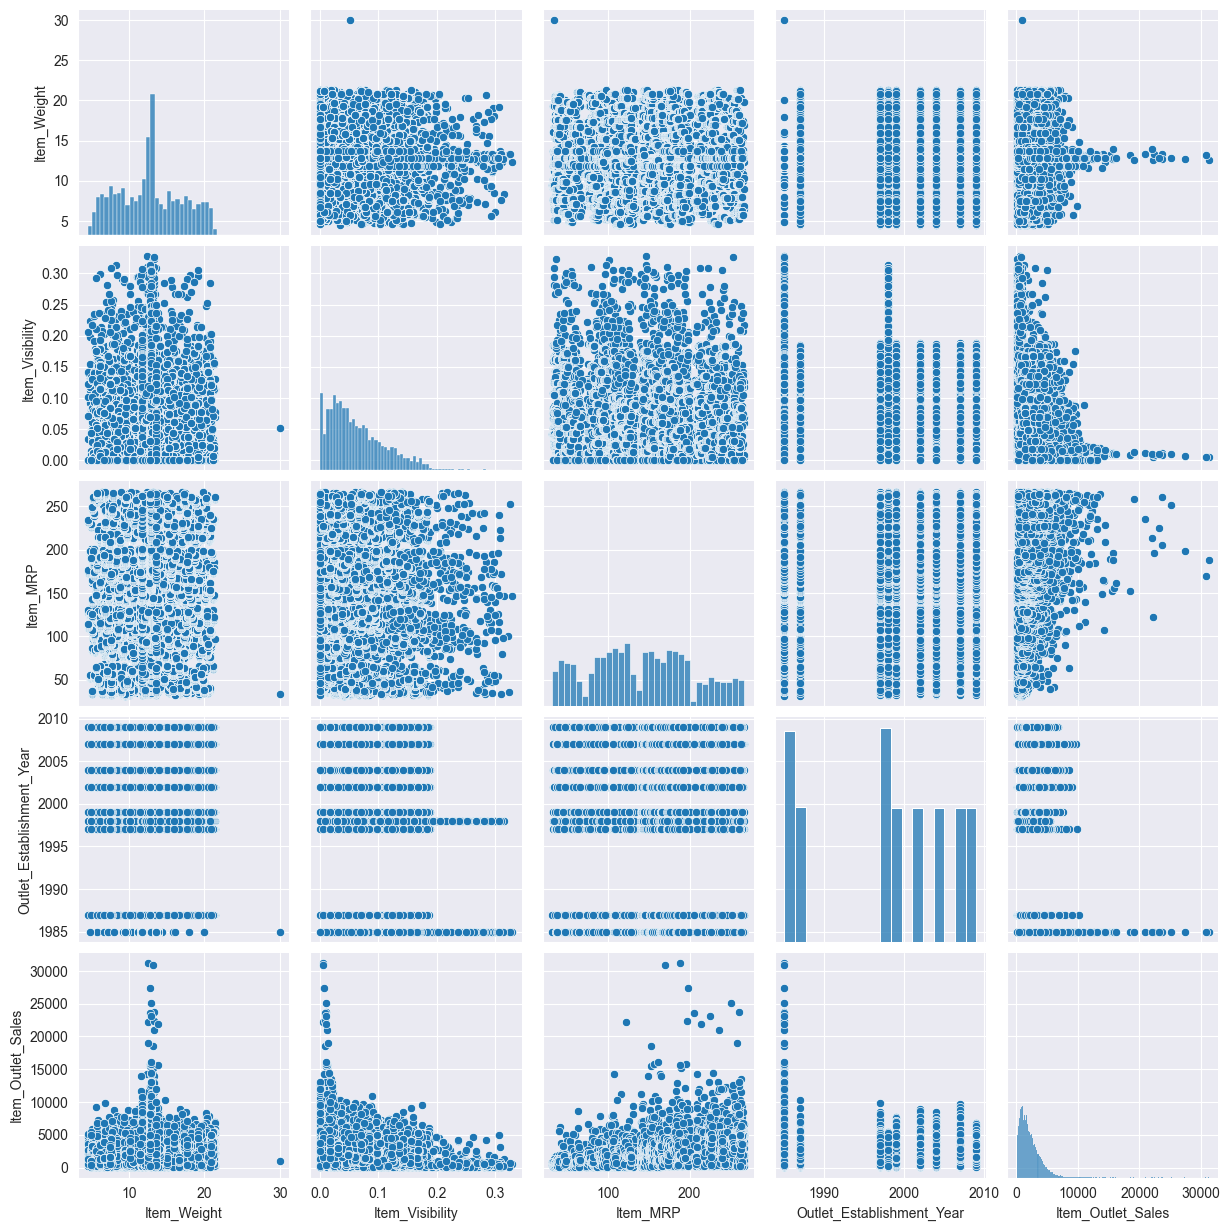

In [8]:
sns.pairplot(df)

Data Preprocessing

In [9]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'LF', 'Regular', 'reg', 'low fat'], dtype=object)

In [10]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [11]:
df.replace({'Item_Fat_Content':{'Low Fat': 0,'Regular' : 1 }},inplace=True)

C:\Users\cheru\AppData\Local\Temp\ipykernel_32980\4242097127.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Item_Fat_Content':{'Low Fat': 0,'Regular' : 1 }},inplace=True)


In [12]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDT36    10
FDG09    10
FDZ56    10
FDT19    10
FDD56    10
         ..
NCW54     7
FDS22     7
FDM50     7
FDX49     7
DRN11     7
Name: count, Length: 1559, dtype: int64

Target vaiable (y) and Feature Variable (x)

In [13]:
y = df['Item_Outlet_Sales']

In [14]:
x = df['Item_Weight','Item_Fat_Content','Item_MRP','Item_Visibility','Outlet_Establishment_Year']

KeyError: ('Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year')

In [19]:
sc =StandardScaler()

In [44]:
x_std = df['Item_Weight','Item_MRP','Item_Visibility','Outlet_Establishment_Year']

KeyError: ('Item_Weight', 'Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year')

In [45]:
x_std

array([[-0.11541705, -1.73178716,  0.88413635,  0.13968068],
       [-0.11541705, -1.72373366,  0.89300616,  1.09531886],
       [-0.11541705, -1.72373366,  0.88958331,  1.3342284 ],
       ...,
       [ 0.00220132,  1.96538148,  0.07011952, -1.29377659],
       [ 0.20444792,  1.97343499,  0.06469366, -1.53268614],
       [ 0.00220132,  1.97504569,  0.07334891,  0.13968068]])

In [46]:
x_std = sc.fit_transform(x_std)

In [47]:
x_std

array([[-0.11541705, -1.73178716,  0.88413635,  0.13968068],
       [-0.11541705, -1.72373366,  0.89300616,  1.09531886],
       [-0.11541705, -1.72373366,  0.88958331,  1.3342284 ],
       ...,
       [ 0.00220132,  1.96538148,  0.07011952, -1.29377659],
       [ 0.20444792,  1.97343499,  0.06469366, -1.53268614],
       [ 0.00220132,  1.97504569,  0.07334891,  0.13968068]])

Train test split

In [48]:
xtr,xtst,ytr,ytst = train_test_split(x_std,y,train_size=80)

Modeling

In [49]:
rfr = RandomForestRegressor()

In [50]:
rfr.fit(xtr,ytr)

RandomForestRegressor()

Predction

In [51]:
ypred = rfr.predict(xtst)

Model evaluation

In [56]:
mean_squared_error(ytst,ypred)

2522810.8350970675

In [57]:
mean_absolute_error(ytst,ypred)

1026.198742458999

In [58]:
r2_score(ytst,ypred)

0.24613932981761766

Explaination

By using numerical variables as features and scaling it using Standard scalar and using in Random Forest regressor we created a model which can predict Item_Outlet_Sales with an mean_absolut_error of 1026.1987 